# Lead Scoring Case Study

                                                                                                  By
                                                                                             Upgrad  DS-46
                                    
                                                                                             Shankar Chaudhary
                                                                                             Deepak Rajan
                                                                                             Md Ahmad
                                                                                             

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

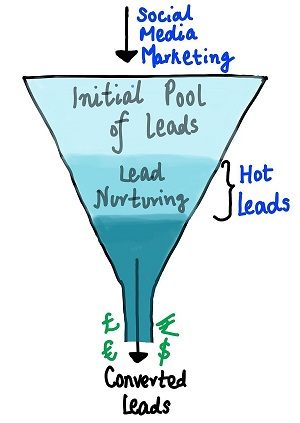

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

#### Goals of the Case Study
There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# 1. Importing all the necessary required libraries for analysis

In [1]:
# Importing the required libraries

import numpy as np # importing numpy as np 
import pandas as pd #  importing pandas as pd
import matplotlib.pyplot as plt # It is a collection of functions that make matplotlib work like MATLAB
import seaborn as sns   # Seaborn is a Python data visualization library based on matplotlib
%matplotlib inline    
import warnings # Warnings are categorized using subclasses of the built-in exception class Warning
warnings.filterwarnings("ignore") # It tells the interpreter to ignore any warnings that are generated during the execution of the code
from sklearn.preprocessing import StandardScaler # It is a class in the scikit-learn library that is used to standardize features by removing the mean and scaling to unit variance

# 2. Loading or Reading the Dataset

In [2]:
# Read or load the 'application_data.csv' file by using pd.read_csv
data=pd.read_csv("/Users/shan/Documents/SHAN/Lead Scoring Case Study/Leads.csv")

# 3  Data inspection, routine check and preparation

### 3.1 Checking the head with 5 rows of dataframe which give ideas about dataset

In [3]:
data.head() # it displays the first five rows of the dataframe by default

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.tail()  # it displays the lst five rows of the dataframe by default

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### 3.2 Checking the shape of dataset like how many number of rows and colums are available

In [5]:
data.shape # shape return the dimension of the dataframe

(9240, 37)

As per dataset found that there are 9240 rows and 37 columns

### 3.3 Checking summary of dataframe

In [6]:
data.info()
# info() It retuns a concise summary of a DataFrame like index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 3.4 Checking description of dataframe

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


The describe() method returns description of the data in the Dataframe. If the DataFrame contains numerical data, the description contains these information for each column.

### 3.5 checking the info and their dtypes

In [8]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Since Prospect ID is Customer ID, it should be unique. Hence, checking is there any Duplicate IDs in the Prospect ID

In [9]:
# Checking if we have any duplicates ID under Prospect ID.

duplicate_prospect_ID = data.duplicated(subset = 'Prospect ID')

print (sum(duplicate_prospect_ID) == 0)

True


There is no duplicates under the Prospect ID

In [10]:
# Checking if we have duplicates ID under Lead Number.

duplicate_LeadNo = data.duplicated(subset = 'Lead Number')
print(sum(duplicate_LeadNo) == 0)

True


There is no duplicates under the Lead Number

From the above analysis, we can understand that Prospect ID and Lead Number are variables that define the same customer who was contacted.
We can drop both the variables as they do not provide us any further insights, hence it may not be appropriate to keep both the variables.

### 3.6 Checking missing Values

In [11]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### 3.7 Checking the null values percentage % in columns

In [12]:
null_data_percentage = data.isnull().sum()*100/len(data)
null_data_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### 3.8 Checking the 45 % and higher null values available in the columns

In [13]:
major_missing_data_col = null_data_percentage [null_data_percentage>=45]
major_missing_data_col

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

## 4. EDA on the Dataset

### 4.1 Data Cleaning and Treatments

In [14]:
# Dropping Lead Number and Prospect ID from the data

data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [15]:
# Checking data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [16]:
# From the problem statement, it is clear to understand that Many of the categorical variables have a level called 'Select'
# which needs to be handled because it is as good as a null value. hence 'Select' can be converted to Null.

data = data.replace('Select', np.nan)

In [17]:
# Checking data again after inserting Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [18]:
# Checking for total null values in the dataset

data.isnull().sum().sum()

54419

There are 54419 Null values present in the data

In [19]:
# Checking for null values present in the each column
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [20]:
# Finding the ratio of Null values present in each column for further analysis

Null_ratio = data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio), 2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [21]:
# Here we are taking a call to remove the columns that have more than 45% of missing values as they do not add on to the analysis


columns =data.columns

for i in columns:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [22]:
# Checking for null ratio after removing the columns which has more than 45% of the Null Values
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### 4.2 EDA on Categorical variables:

In [23]:
# Checking the data again after inserting Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [24]:
# Value counts of Country column

# data['›'].value_counts()

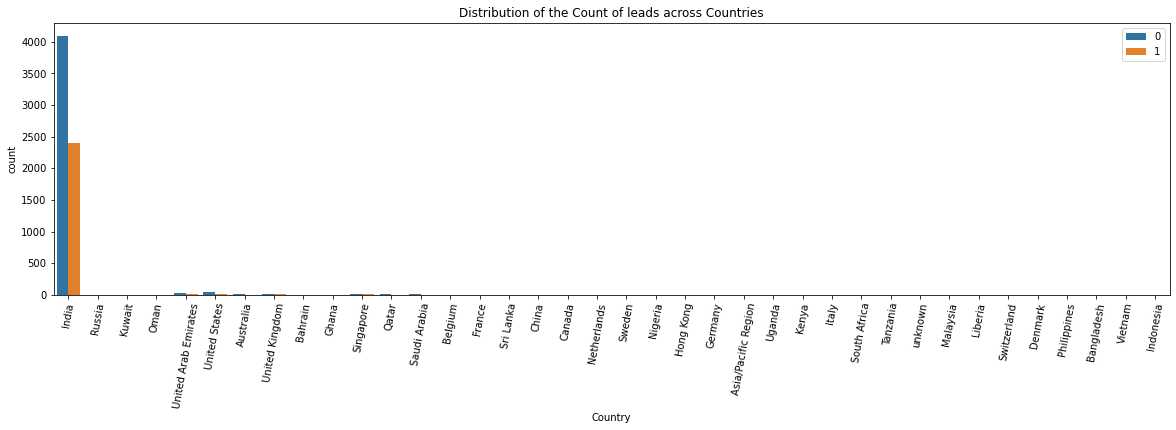

In [25]:
# Visualising the Country column

# Setting the frame
plt.figure(figsize=(20,5))

# Visualing the Countplot
Count_fig=sns.countplot(data.Country, hue=data.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=80)

# Formatting the figure
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

In [26]:
# Checking the most frequent Country in th Country Column 

data['Country'].mode()

0    India
dtype: object

In [27]:
# From the above, we can understand that India is the most occuring country in the Country Column.
# Hence we can replace null values with India

data['Country'] = data['Country'].replace(np.nan,'India')

In [28]:
# Checking the value count after imputing the null values
data['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Sweden                     3
Philippines                2
Uganda                     2
China                      2
Belgium                    2
Italy                      2
Netherlands                2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
Liberia                    1
Kenya                      1
Russia                     1
Sri Lanka                  1
Tanzania                   1
Switzerland                1
Malaysia      

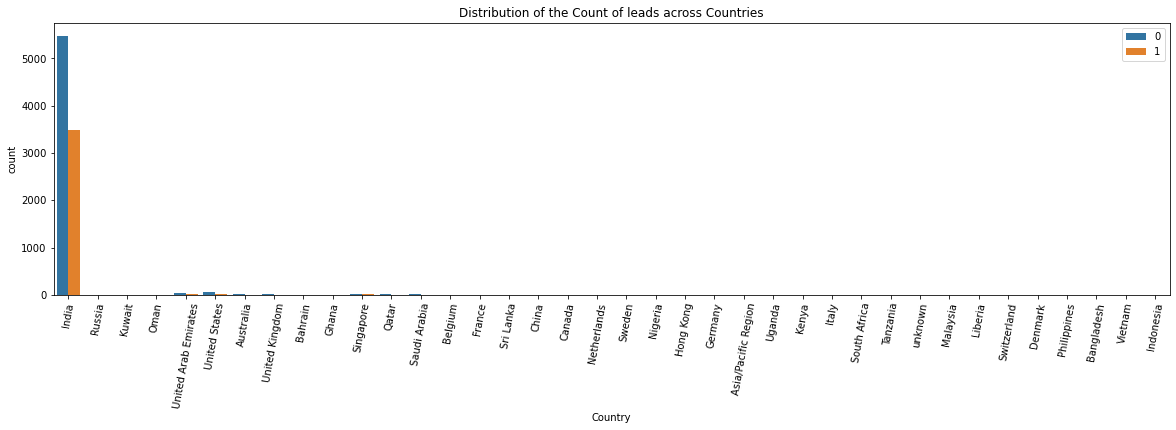

In [29]:
# Visualising the Country column after replacing NaN values

# Setting the frame
plt.figure(figsize=(20,5))

# Visualing the Countplot
Count_fig=sns.countplot(data.Country, hue=data.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=80)

# Formatting the figure
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()


Since "India" is tagged as the most occuring Country, it may not be suitable for an analysis - especially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.

In [30]:
# Removing Country column frmom data
data.drop('Country',1,inplace=True)

In [31]:
# Checking if Country in present in the data column

"Country" in data.columns

False

In [32]:
# Rechecking the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [33]:
# Checking the City Column in the data

data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
# Checking for the most frequest value in City 
data['City'].mode()

0    Mumbai
dtype: object

Mumbai has been tagged as the most frequently occurring value. hence we can impute Null values with Mumbai

In [35]:
# Imputting Null Values with Mumbai 
data['City'] = data['City'].replace(np.nan,'Mumbai')

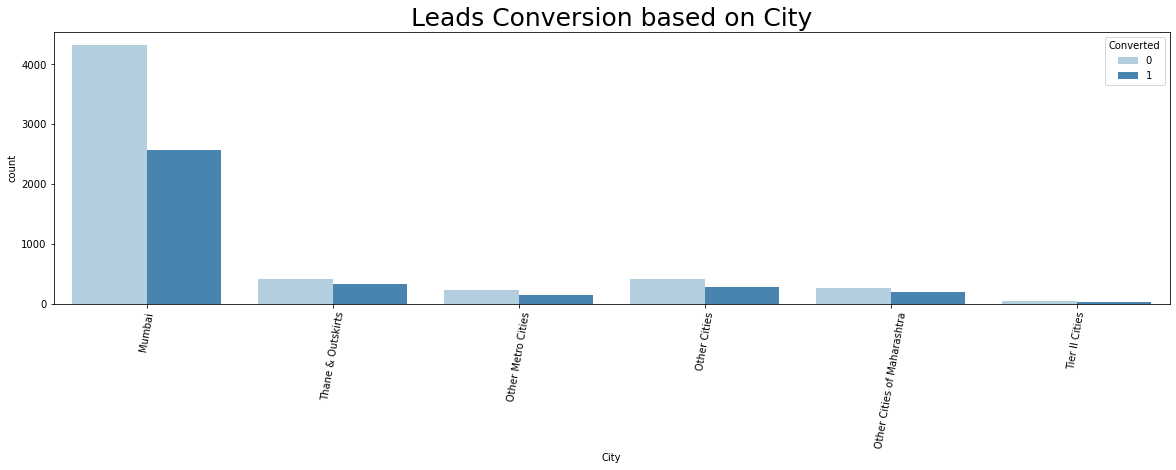

In [36]:
# Visuaising the City columnn after amending Null values

plt.figure(figsize=(20,5))

# Visualising using Countplot
count_fig=sns.countplot(data["City"], hue=data['Converted'],palette='Blues')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

# Formatting the figure
plt.title("Leads Conversion based on City",fontsize=25)
plt.show()

Similar to the previous analysis we can confirm that Mumbai is the most occurring city in the data.

In [37]:
# Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [38]:
# Checking the Specialization column in dataset

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
# There seems to be a scenario in this variable.
# Some customer may not have mentioned specialization as it was not in the list or there aren't any 
# Hence we can impute the NA's as 'Not Specified'

data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

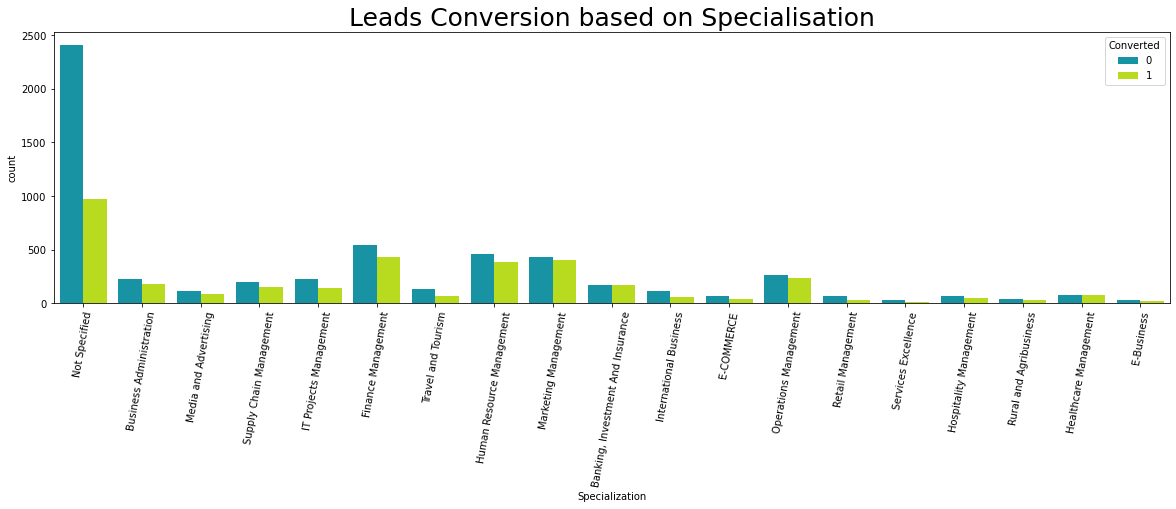

In [40]:
# Plotting spread of Specialization columnn 

# Setting the frame
plt.figure(figsize=(20,5))

# Visualising using Countplot

count_fig=sns.countplot(data['Specialization'], hue=data['Converted'],palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

# Formatting the plot
plt.title("Leads Conversion based on Specialisation",fontsize=25)
plt.show()

Insights - **Management** has the  higher number of leads converted. This is important and should not be removed.

In [41]:
data['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [42]:
# Since Management is an import metric inside Specialization, we could combine the entire Managements under one umbrella
# We will call this combo as Management_Specializations

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

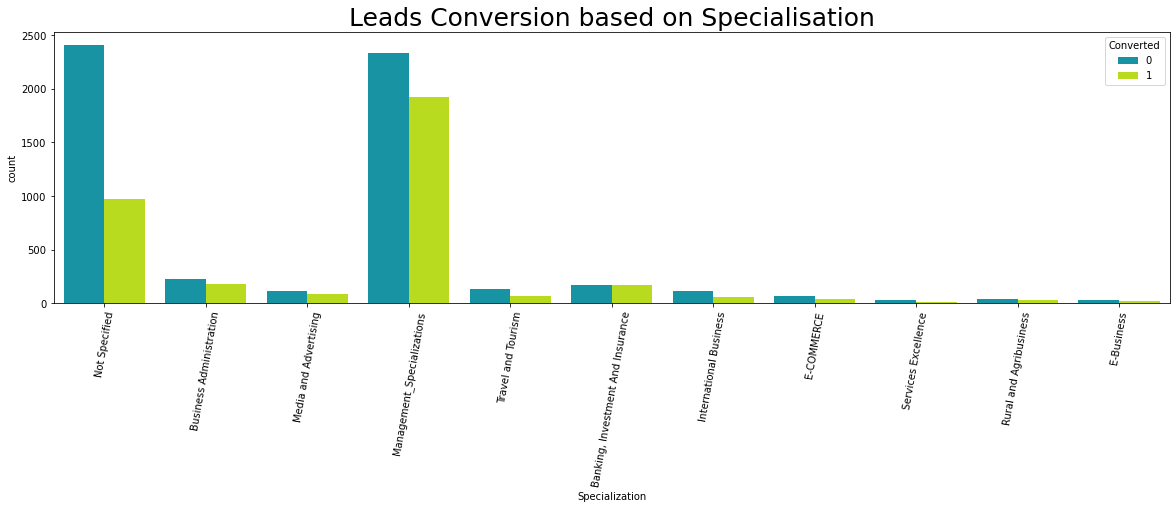

In [43]:
# Plotting Specialization column after consolidating the Management Sepcializations

# Setting the frame
plt.figure(figsize=(20,5))

# Visualising using Countplot

count_fig=sns.countplot(data['Specialization'], hue=data['Converted'],palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

# Formatting the plot
plt.title("Leads Conversion based on Specialisation",fontsize=25)
plt.show()

In [44]:
# Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [45]:
# Checking "What is your current occupation" as it has the most Null values in the above info
# Looking for value counts inside the Occupation

data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**Since we have most of the Occupation listed under the Occupation column and we can still find NA values, we can impute NA's with "Unemployed"**

In [46]:
# Replacing Null values with "Unemployed"

data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [47]:
# Value counts after imputation
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

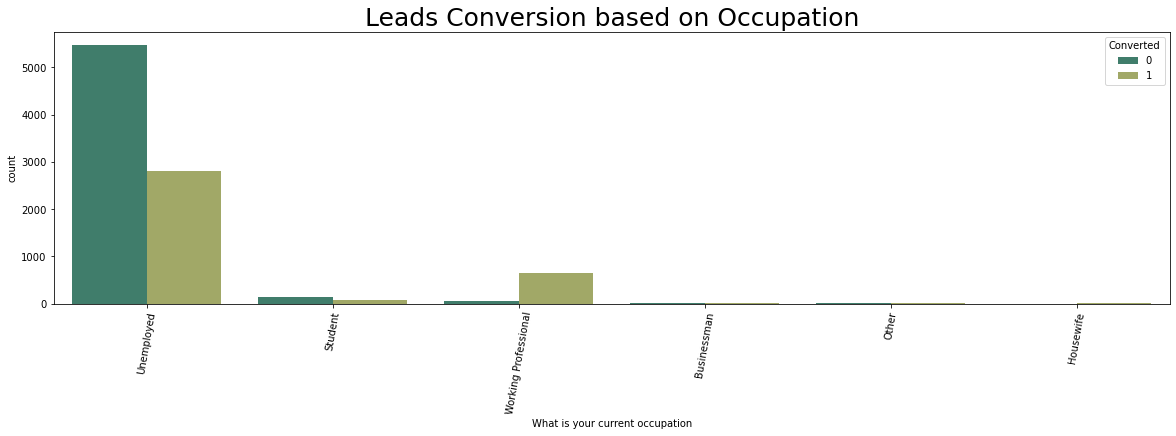

In [48]:
# Visualizing the Employment Variable

# Setting the frame
plt.figure(figsize=(20,5))

# Visualising using Countplot

count_fig=sns.countplot(data['What is your current occupation'], hue=data['Converted'],palette='gist_earth')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

#Formatting the plot
plt.title("Leads Conversion based on Occupation",fontsize=25)
plt.show()

In [49]:
# Ratio of categories after imputation
data['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

**From the above two analysis, we can understand :**
- Chances are high for the Working Professionals who would be going for the courses.
- Unemployed leads are the most in this leads
- Housewives, Businessman, Student and Other categories may not be converted to join the courses.

In [50]:
# Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [51]:
# Checking the variable "What matters most to you in choosing a course"

data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [52]:
# Replacing Null values with Mode "Better Career Prospects"

data ['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

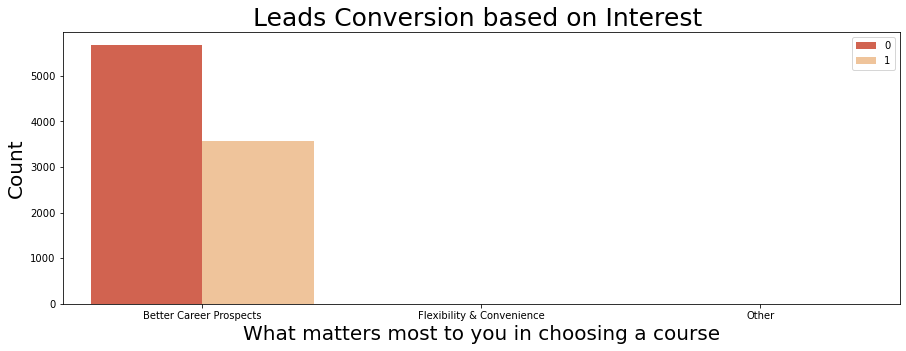

In [53]:
# Visualizing Variable "What matters most to you in choosing a course"

# Setting the frame
plt.figure(figsize=(15,5))

# Visualising using Countplot

count_fig=sns.countplot(data['What matters most to you in choosing a course'], hue=data['Converted'],palette='OrRd_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Interest ",fontsize=25)
plt.xlabel("What matters most to you in choosing a course", fontsize=20)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=20)
plt.show()

In [54]:
# Checking Ratio of variable
data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Since "Better Career Prospects" influences the column drastically, we can remove that column as it will create bias

In [55]:
data.drop('What matters most to you in choosing a course',1,inplace=True)

In [56]:
# Rechecking data after removing the variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [57]:
# Checking value counts of  variable 'Tag'
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

**Since the lead has not confirmed on the tag, we can impute Null values as "Not Specified"**

In [58]:
# Changing Nan values in Tag with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

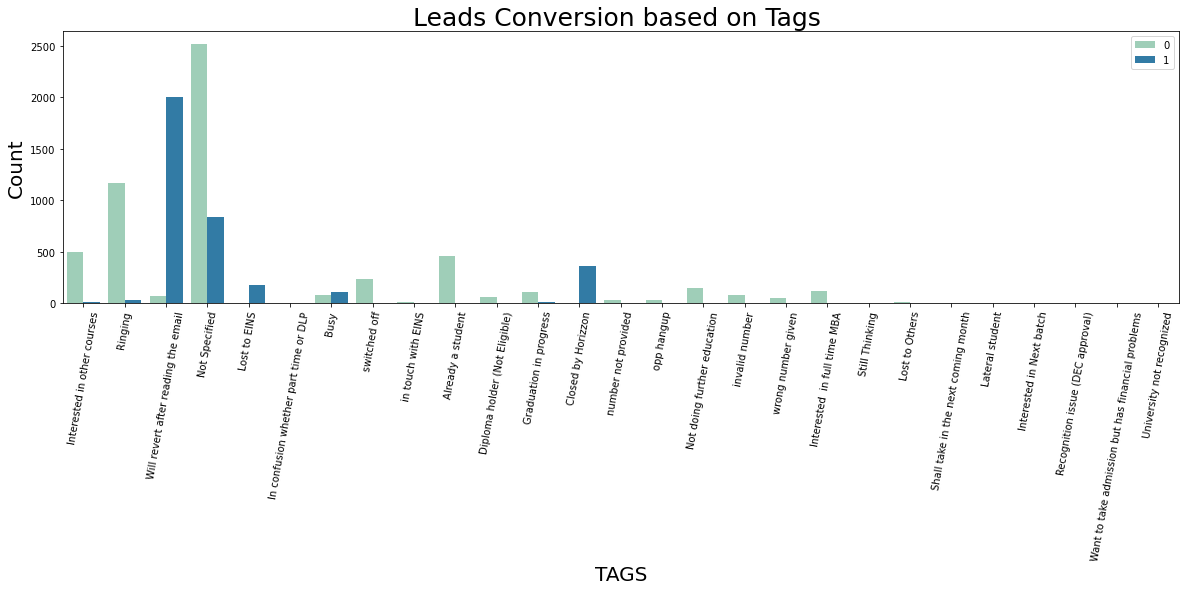

In [59]:
# Countplot on Tag variable

# Setting the frame
plt.figure(figsize=(20,5))

# Visualising using Countplot

count_fig=sns.countplot(data['Tags'], hue=data['Converted'],palette='YlGnBu')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

# Formatting the plot
plt.title("Leads Conversion based on Tags ",fontsize=25)
plt.xlabel("TAGS", fontsize=20)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=20)
plt.show()

In [60]:
# Since some tags have very minimal values, we can replace them as "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



In [61]:
# Rechecking the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [62]:
# Rechecking the null values in the data
data.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [63]:
# Checking value counts of Lead Source column

data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

Since Lead source has very less null values, we can replace Null as Others

In [64]:
# Replacing Null as Other in the Lead Source
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')

In [65]:
# Also we can combining low frequency values present in the Lead Source

data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

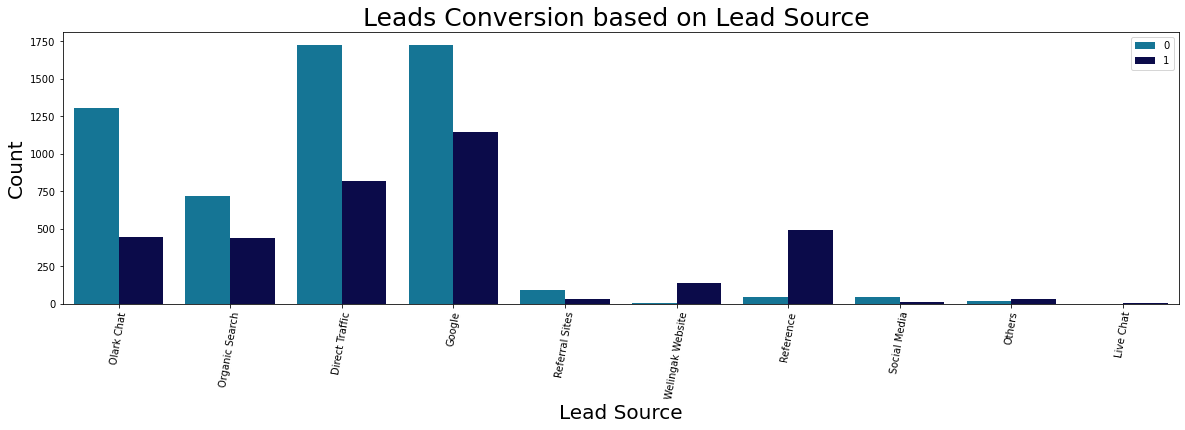

In [66]:
# Countplot on Lead Source variable

# Setting the frame
plt.figure(figsize=(20,5))

# Visualising using Countplot

count_fig=sns.countplot(data['Lead Source'], hue=data['Converted'],palette='ocean_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

# Formatting the plot
plt.title("Leads Conversion based on Lead Source ",fontsize=25)
plt.xlabel("Lead Source", fontsize=20)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=20)
plt.show()

#### Analysis :
    Most of the leads generated are through the "Google" & "Direct traffic" and the least through the "Live Chat"
    "Welingak website" has the most conversion rate
    Lead conversion can be improved by maximising leads from "Reference" and "Welingak website"
    Focussing "Olark chat","Organic search","Direct Traffic", and "Google" leads may increase the lead conversion.

In [67]:
# Checking Last Activity variable

data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [68]:
# Checking on the ratio of categories

data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [69]:
# Converting Null values to "others"
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')

In [70]:
# Replacing categories which are less than 1% to Others as it does not make much impact for analysis

data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [71]:
# Checking the values of the Last Activity Variable

data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [72]:
# Recheck the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [73]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

As per above data we have the total NA's less than 2%, so we can remove the rows as it will not have any effect on the model

In [74]:
# Droping NA values from data
data = data.dropna()

In [75]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [76]:
# Checking the Lead Origin variable

data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

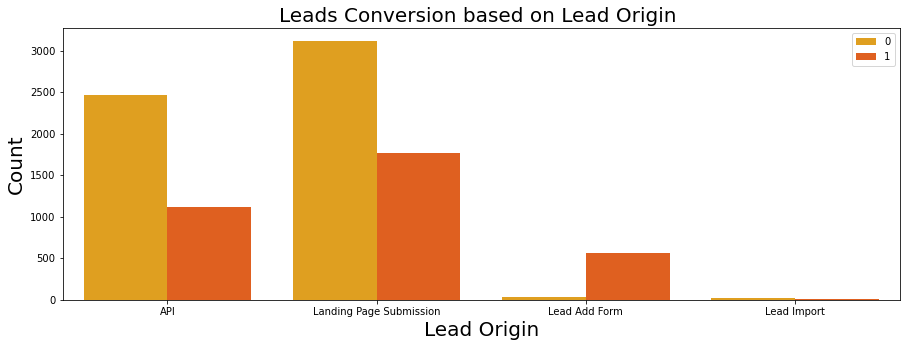

In [77]:
# Visualizing count of Variable based on Converted value

# Setting the frame
plt.figure(figsize=(15,5))

# Visualising using Countplot

count_fig=sns.countplot(data['Lead Origin'], hue=data['Converted'],palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

# Formatting the plot
plt.title("Leads Conversion based on Lead Origin ",fontsize=20)
plt.xlabel("Lead Origin", fontsize=20)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=20)
plt.show()

#### Analysis
API and Landing Page Submission bring more number of leads as well as conversion.

Lead Add Form has a very high conversion rate but count of leads are not very high.

If Lead add form could get more leads, then the rate of conversion can be very high and for overall growth

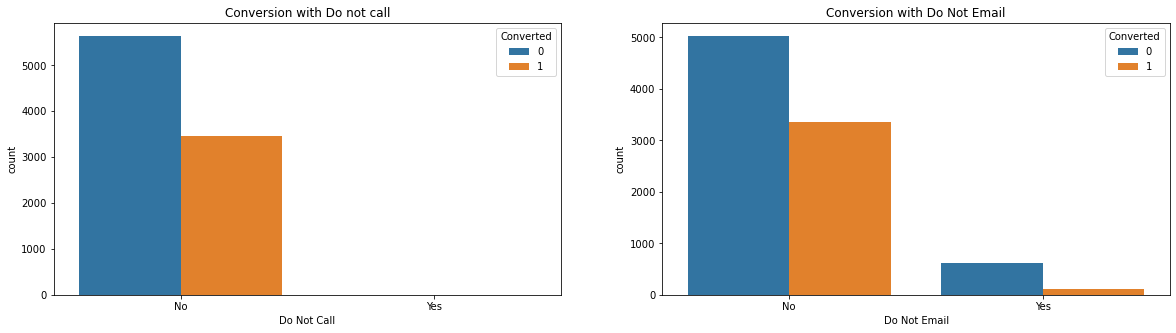

In [78]:
# Checking the variables Do Not Email & Do Not Call using a Subplots

plt.figure(figsize=(20,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data['Do Not Call'], hue=data['Converted'])
plt.title("Conversion with Do not call")

ax2=plt.subplot(1, 2, 2, sharex=ax1)
ax2=sns.countplot(data['Do Not Email'], hue=data['Converted'])
plt.title("Conversion with Do Not Email")
plt.show()

In [79]:
# Evaluating value counts for Do Not Call variable

data['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

Since Do Not Call has No as most occuring category it will create bias . So we can remove this from data

In [80]:
# Dropping "Do Not Call" from the data
data.drop("Do Not Call", 1, inplace=True)

In [81]:
# Rechecking Data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                              

In [82]:
# Checking value counts for "Do Not Email"
data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [83]:
# Ratio of the "Do Not Email"

data['Do Not Email'].value_counts(dropna=False, normalize = True)*100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

## 5 Checking for categorical variables if they can be dropped

In [84]:
Check_cat_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [85]:
for i in Check_cat_var:
    print(i)
    print(data[i].value_counts(dropna=False))
    print("--------------------------------------------")

Search
No     9089
Yes      14
Name: Search, dtype: int64
--------------------------------------------
Magazine
No    9103
Name: Magazine, dtype: int64
--------------------------------------------
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
--------------------------------------------
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
--------------------------------------------
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
--------------------------------------------
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
--------------------------------------------
Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
--------------------------------------------
Receive More Updates About Our Courses
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
--------------------------------------------
Update me on Suppl

From the above we can understand that the variables listed under cols_to_drop can be dropped.

In [86]:
# Dropping the "Check_cat_var"
data.drop(Check_cat_var,1, inplace=True)

In [87]:
# Checking value counts of last Notable Activity
data ['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [88]:
# We can consolidate the categories that has less than 1% occurance on the Last Notable Activity

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

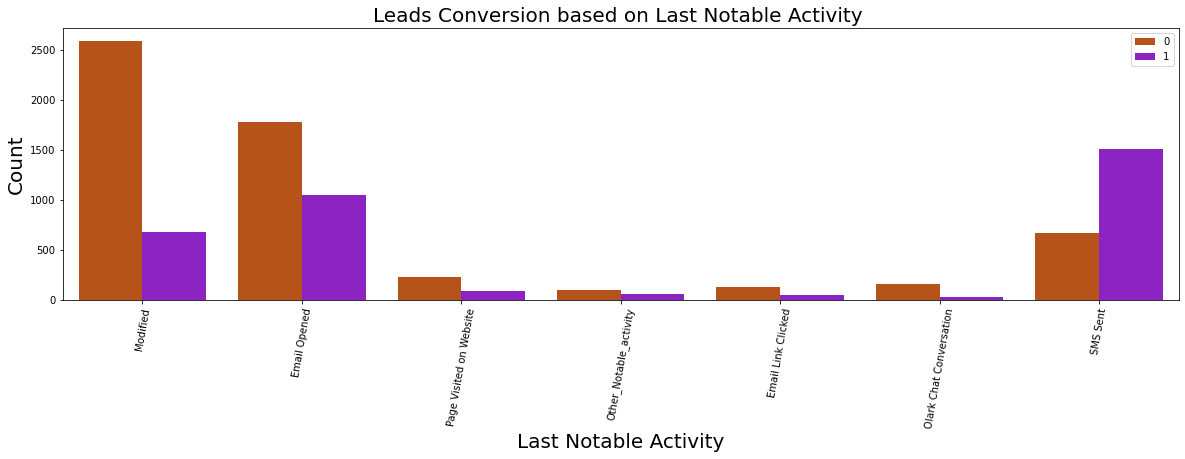

In [89]:
# Visualizing count of Variable based on Converted value

# Setting the frame
plt.figure(figsize=(20,5))

# Visualising using Countplot

count_fig=sns.countplot(data['Last Notable Activity'], hue=data['Converted'],palette='gnuplot_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=80)

# Formatting the plot
plt.title("Leads Conversion based on Last Notable Activity ",fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=20)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=20)
plt.show()

#### Analysis:-
    SMS Sent has more conversion than any of the activity
    Seems Modified has the least conversion ratio
    Also, Other Notable Activity also has almost very signifiable reason for conversion

In [90]:
# Count of categories under Last Notable Activity

data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [91]:
# Checking the ratio of the Notable Activity
data['Last Notable Activity'].value_counts(normalize = True)* 100

Modified                   35.922223
Email Opened               31.055696
SMS Sent                   23.860266
Page Visited on Website     3.493354
Olark Chat Conversation     2.010326
Email Link Clicked          1.900472
Other_Notable_activity      1.757662
Name: Last Notable Activity, dtype: float64

In [92]:
# Checking the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## 6  Analysis on Numerical Variables

**Converted Column**

In [93]:
data['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [94]:
data['Converted'].value_counts(normalize=True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

From the above we can see that the conversion rate is 38%

## 7 Analysing the numerical variables on Correlation using a heatmap

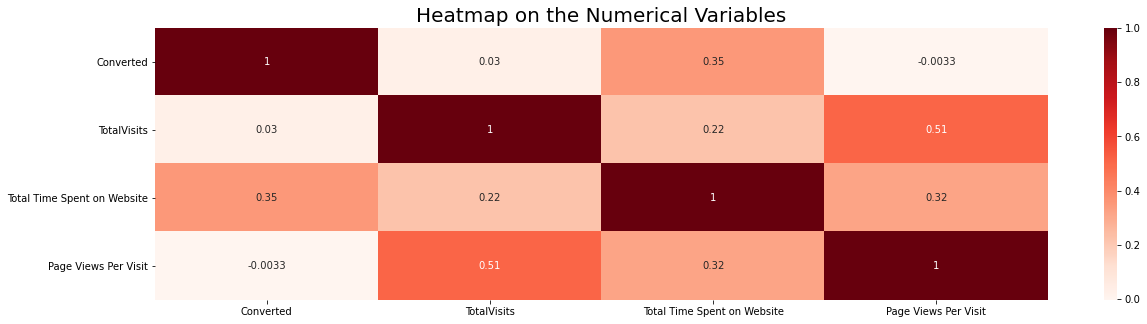

In [95]:
# Setting the frame
plt.figure(figsize=(20,5))

# heatmap
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.title("Heatmap on the Numerical Variables",fontsize=20)
plt.show()

<AxesSubplot:>

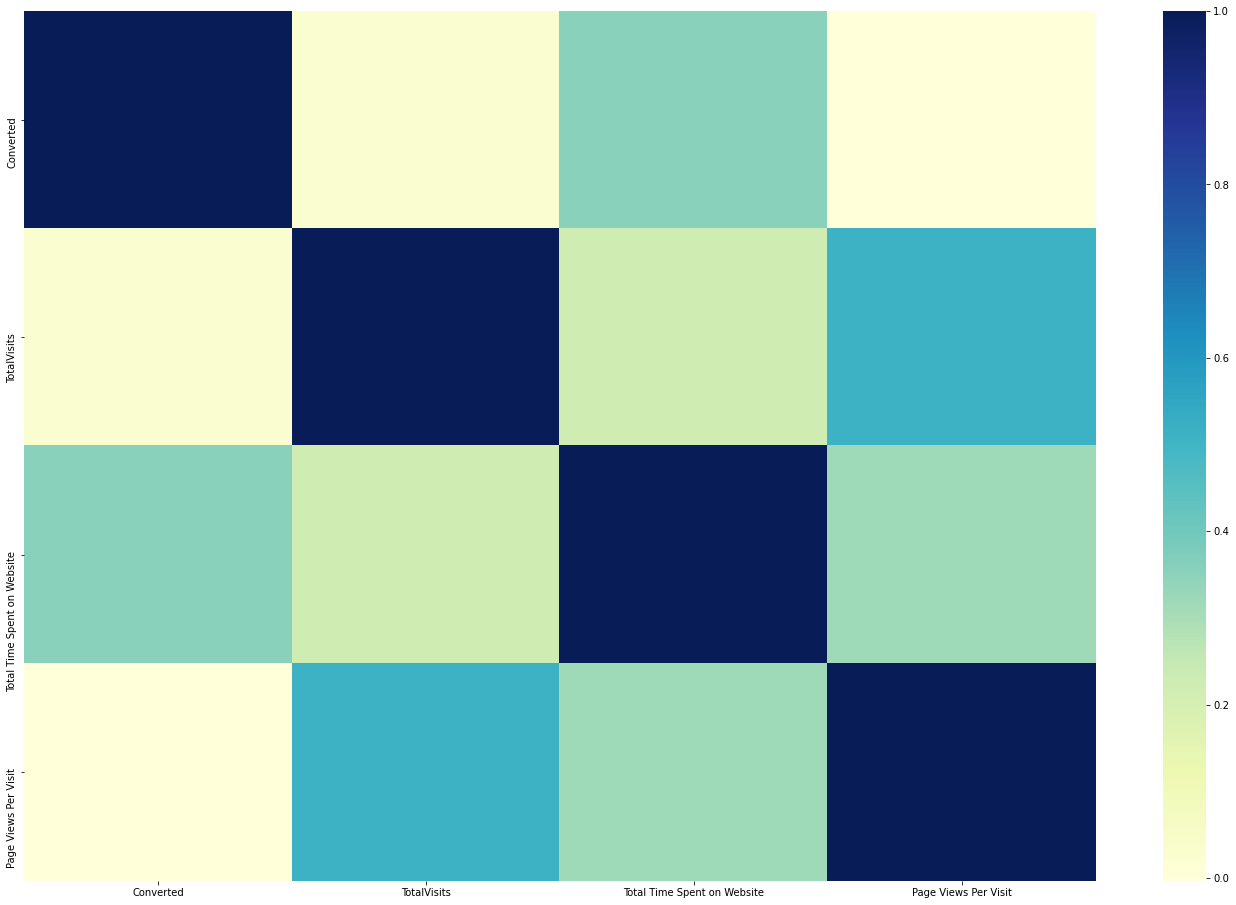

In [96]:
# Visualizing the correlation between all set of usable columns

plt.figure(figsize=(24, 16))
sns.heatmap(data.corr(), cmap="YlGnBu")

### 8 Analysis the Numerical variables by using Boxplots

In [97]:
# Analysing the Total Time Spent on Website variable
data['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

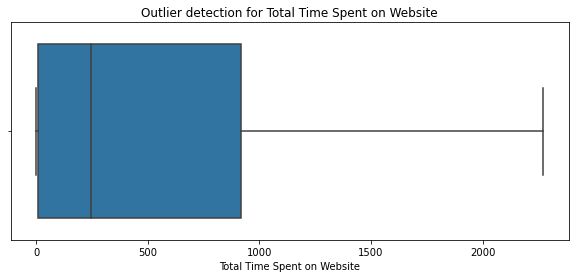

Median of "Total Time Spent on Website" is  244.0


In [98]:
# Outlier Detection of numeric variable using boxplot

plt.figure(figsize=(10,4))

sns.boxplot(x=data['Total Time Spent on Website'])

plt.title('Outlier detection for Total Time Spent on Website')
plt.show()

print ('Median of "Total Time Spent on Website" is ', data['Total Time Spent on Website'].median())

**Also we can see that there are no Outlier for the "Total Time Spent on website", hence no action required for this variable.**

In [99]:
# Analysing the Total Time Spent on Website variable
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

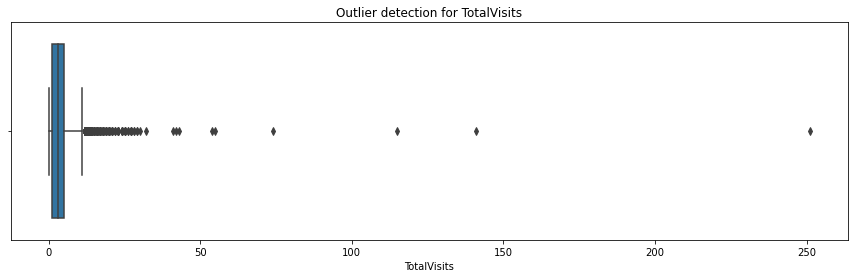

Median of TotalVisits is 3.0


In [100]:
# Setting the figure

plt.figure(figsize=(15,4))

sns.boxplot(x=data['TotalVisits'])

## Formatting the figure
plt.title('Outlier detection for TotalVisits')
plt.show()

print ('Median of TotalVisits is', data['TotalVisits'].median())


**From the above we can see that there are Outliers present in the data.**

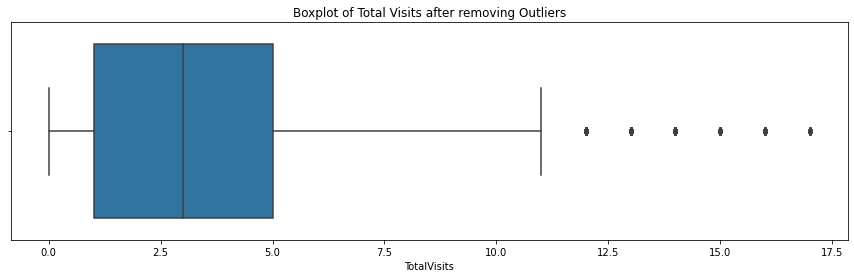

In [101]:
# Removing the Oultiers from the data

plt.figure(figsize=(15,4))

Q3 = data['TotalVisits'].quantile(0.99)

data = data[(data['TotalVisits'] <= Q3)]

Q1 = data['TotalVisits'].quantile(0.01)

data = data[(data['TotalVisits'] >= Q1)]

sns.boxplot(x=data['TotalVisits'])
plt.title("Boxplot of Total Visits after removing Outliers")
plt.show()

In [102]:
data.shape

(9020, 14)

In [103]:
# Analysing Page Views Per Visit

data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

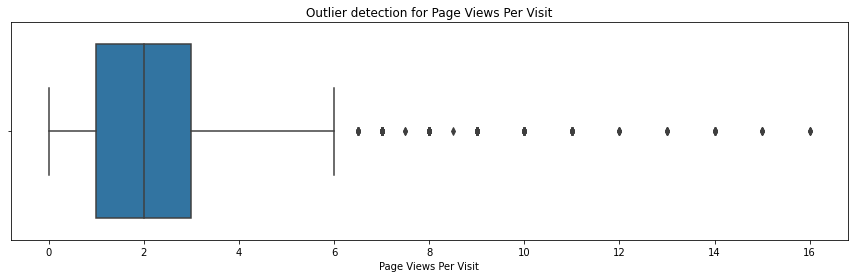

Median of Page Views Per Visit is 2.0


In [104]:
# Boxplot for  Page Views Per Visit

plt.figure(figsize=(15,4))

sns.boxplot(x=data['Page Views Per Visit'])

# Formatting the figure
plt.title('Outlier detection for Page Views Per Visit')
plt.show()

print ('Median of Page Views Per Visit is', data['Page Views Per Visit'].median())


#### Since there are Outliers present in the data, we need to remove them. We will cap it at 1%

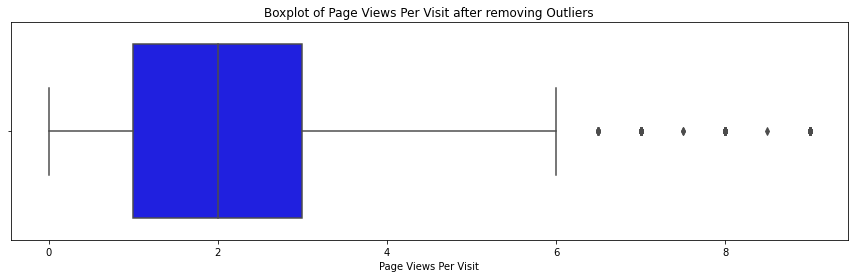

In [105]:
# Formatting the figure
plt.figure(figsize=(15,4))

Q3 = data['Page Views Per Visit'].quantile(0.99)

data = data[(data['Page Views Per Visit'] <= Q3)]

Q1 = data['Page Views Per Visit'].quantile(0.01)

data = data[(data['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=data['Page Views Per Visit'],color = "Blue")
plt.title("Boxplot of Page Views Per Visit after removing Outliers")
plt.show()

In [106]:
# Checking on the shape of the dataset 
data.shape

(8953, 14)

In [107]:
# Checking the total null values inside the data
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We can see that there are no NA values present in the data

## 9 Model Preparation

### 9.1 Step 1. Creating Dummy variables

In [108]:
# First we need to get a list of categorical columns present in the data

categorical_vals= data.select_dtypes(include=['object']).columns
categorical_vals

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Printing Categorical variables to know if mapping is required

In [109]:
for i in categorical_vals:
    print(i)
    print(data[i].value_counts())
    print("-------------------------------------------------------")

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
-------------------------------------------------------
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64
-------------------------------------------------------
Do Not Email
No     8256
Yes     697
Name: Do Not Email, dtype: int64
-------------------------------------------------------
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submi

In [110]:
# We can see that 'A free copy of Mastering The Interview','Do Not Email' has yes and no's which can 
# Converted to1's and 0's

map_var = ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
data[map_var] = data[map_var].apply(binary_map)

In [111]:
# Checking if the mapping has gone through

data[map_var].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


#### Adding Dummy Variables to the data  for 'Lead Origin','What is your current occupation' and 'City'

In [112]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

#### Adding Dummy Variables to the data  for Specialization

In [113]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Lead Source

In [114]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Last Activity

In [115]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Last Notable Activity

In [116]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

#### Adding Dummy Variables to the data  for Tags

In [117]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

#### Since we have created dummy variables for all the categorical variables, we can remove the original columns from the data

In [118]:
#dropping the original columns after dummy variable creation

data.drop(categorical_vals,1,inplace = True)

In [119]:
#Checking the data to see if the applied EDA is clear
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
# Checking if we have any categorical variable present in the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

### Since there are no variables present, we can go ahead in creating the model

## 10 Model Building: Logistic Regression

#### Splitting the data into Training and Testing Set - For this we need to import Train Test Split from SKLearn

In [121]:
from sklearn.model_selection import train_test_split

y = data['Converted'] # Target Variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
# Independent Variables
X=data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [123]:
# Splitting into train and test data at 70/30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [124]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.0,1490,5.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,3.0,457,3.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,4.0,126,2.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,2.0,393,2.00,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,4.0,1167,1.33,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [125]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,3.0,183,3.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,4.0,141,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,3.0,252,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [126]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [127]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [129]:
X_train.shape

(6267, 56)

In [130]:
y_train.shape

(6267,)

In [131]:
X_test.shape

(2686, 56)

In [132]:
y_test.shape

(2686,)

## 10 Scaling of Data using Standard Scaler from SciKit Learn

In [133]:
# Importing Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting numerical columns for scaling 

numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### 10.1  Building Logistic Regression using Stats Model & RFE:

In [134]:
# Importing Statsmodels
import statsmodels.api as sm

In [135]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
 # Running RFE with 15 variables 
rfe = RFE(logreg, 15)    
rfe = rfe.fit(X_train, y_train)

In [136]:
# Printing the Output 
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [137]:
# Combining the data to understand the full RFE data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [138]:
# Checking the RFE Supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [139]:
# Listing the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

### 10.2 From here we can start building models for further analysis

In [140]:
# Model building

X_train_sm = sm.add_constant(X_train[col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 24 Jan 2023   Deviance:                       2509.3
Time:                        22:02:38   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

When evaluating the RFE , we should remove the variable that has highest P-value.
So in this table, we can see that Source_Referral Sites has the highest P-value and that should be dropped for further analysis

In [141]:
# Dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [142]:
# Model 2 after removing the Lead Source Referral Sites

X_train_sm = sm.add_constant(X_train[col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Tue, 24 Jan 2023   Deviance:                       2510.7
Time:                        22:02:38   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

Now we can see that all the variables have their the p-values equal to 0. So we can check for the VIF Variance Inflation Factor for checking if there are any correlation between the variables

 #### VIF Variance Inflation Factor for checking correlation between variables

In [143]:
# Importing VIF from Stasmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


We can see that there is a high correlation between two variables **"Last Notable Activity_SMS Sent"** and **Last Activity_SMS Sent**,  so we need drop the variables one by one based on their values

In [145]:
# Removing variable with high VIF Value

col = col.drop('Last Notable Activity_SMS Sent',1)

In [146]:
# Logistic Model 3
X_train_sm = sm.add_constant(X_train[col])
log_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Tue, 24 Jan 2023   Deviance:                       2526.6
Time:                        22:02:38   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


Since all the values are below 5, we can go ahead to interpret Probabilities, Lead Score and  Predictions on Train Data

In [148]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [149]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [150]:
# Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

# Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [151]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [152]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3693  189]
 [ 281 2104]]


In [153]:
# Printing the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [154]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [155]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)


True positive is  2104
True negatives is  3693
False positives is  189
False negatives is  281


- As per above data we can see that we have got a very good predition with the model

## 11 Now we need to Check on the sensitivity and Specificity

In [156]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  88.22 %


In [157]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  95.13 %


In [158]:
# Calculate False Postive Rate
# In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.

False_Postive_Rate =round((FP/ float(TN+FP))*100,2)
print('False Postive Rate is ',False_Postive_Rate,'%')

False Postive Rate is  4.87 %


In [159]:
# positive predictive value 
positive_predictive_value = round((TP / float(TP+FP))*100,2)

print('positive predictive value is ',positive_predictive_value,'%')



positive predictive value is  91.76 %


In [160]:
# Negative predictive value
Negative_predictive_value= round((TN / float(TN+ FN))*100,2)

print('Negative predictive value is ',Negative_predictive_value,'%')

Negative predictive value is  92.93 %


- From the above Analysis, it clear that we have a very good predictive model

## 11 PLOTTING ROC CURVE

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

<Figure size 1080x1080 with 0 Axes>

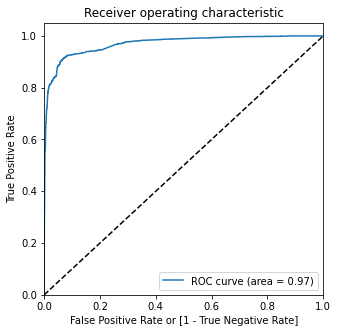

In [163]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

- A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.
- Generally, the ROC Curve should be a value close to 1 to be a good model.
- Here we are getting a good value of 0.97 indicating a good predictive model.

## 12  Optimal Cutoff Point

In [164]:
# We need to create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head() # Head of the newly created columns

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [165]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


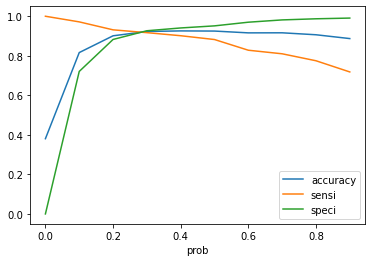

In [166]:
# Let's plot the "accuracy", "sensitivity" and "specificity" for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

It can be seen that cut off point is 0.3

In [167]:
# From the above curve, We have seen that "0.3" is the optimum cut off point

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [168]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [169]:
# Checking the Accuracy

accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
accuracy = round(accuracy*100,2)
print ('Accuracy is ',accuracy, '%')

Accuracy is  92.29 %


In [170]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[3597,  285],
       [ 198, 2187]])

In [171]:
TP = confusion_2[1,1]
TN = confusion_2[0,0]
FP = confusion_2[0,1]
FN = confusion_2[1,0]


print("True positive is ",TP ) 
print('True negative is ',TN )
print('False positive is ',FP )
print('False negative is ',FN)

True positive is  2187
True negative is  3597
False positive is  285
False negative is  198


In [172]:
# Checking sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN)*100,2)
print(sensitivity, '%')

91.7 %


In [173]:
# Checking specificity of our Logistic Regression Model
specificity = round(TN / float(TN+FP)*100,2)
print(specificity, '%')

92.66 %


**Analysis with reference to above results:**

Based on the scores that we have been got, which indicates that our model performed very well.

- The ROC curve has a value of 0.97
- Accuracy reached a total of 92.29%
- Sensitivity is 91.7%
- Specificity is 92.66%

Further to the above, we can also calculate the below metrics
 - False Positive Rate
 - Positive Predictive Value
 - Negative Predictive Values
 - Precision & Recall. 

### False Positive Rate

In [174]:
FPR = (FP/ float(TN+FP)*100)
print(round(FPR,2), '%')

7.34 %


### Positive predictive

In [175]:
print ('Positive predictive value is ',round(TP / float(TP+FP)*100,2), '%')

Positive predictive value is  88.47 %


### Negative predictive value

In [176]:
print ('Negative predictive value is ',round(TN / float(TN+ FN)*100,2), '%')

Negative predictive value is  94.78 %


### Confusion matrix


In [177]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]])

### Calculating Precision and Recall

In [178]:
# Precision
TP / TP + FP

print(confusion[1,1]/(confusion[0,1]+confusion[1,1])*100,2 , '%')

88.47087378640776 2 %


In [179]:
# Recall
TP / TP + FN

print(confusion[1,1]/(confusion[1,0]+confusion[1,1])*100,2 , '%')

91.69811320754717 2 %


In [180]:
# Importing Precision and Recall from SKlearn

from sklearn.metrics import precision_score, recall_score

In [181]:
precision  = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
print('Precision is ',round(precision*100,2), '%')

Precision is  88.47 %


In [182]:
Recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
print('Recall is ',round(Recall*100,2), '%')

Recall is  91.7 %


### Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

In [183]:
#Importing Precision Recall curve
from sklearn.metrics import precision_recall_curve

In [184]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

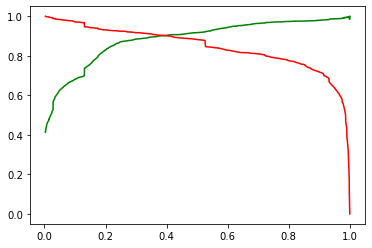

In [185]:
# Plotting the Precision Recall Curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Since our Model is performing well on the training set, we can start predicting on the test set

In [186]:
# Scaling test set with the same Scaler that we scaled the training set

numerical_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

# Transforming the test set

X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [187]:
# Selecting the columns that were identified by RFE in the training set

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


#### Adding constant to the Test set

In [188]:
X_test_sm = sm.add_constant(X_test)

### Predictions on the test set

In [189]:
y_test_pred = res.predict(X_test_sm)

In [190]:
# Checking if we have got the output

y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [191]:
# Now we can convert y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [192]:
# Checking the head
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [193]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [194]:
# Resetting index to Prospect ID
y_test_df['Prospect ID'] = y_test_df.index

In [195]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Concatenating  the test dataframe and training dataframe for comparison
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

## 13 Final Prediction Figure from the final dataframe

In [197]:
# Checking the final dataframe
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [198]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob_Conv'})

In [199]:
y_pred_final.head()

,Converted,Prospect ID,Prob_Conv
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [200]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Prob_Conv']]
y_pred_final['Lead_Score'] = y_pred_final['Prob_Conv'].map( lambda x: round(x*100))

In [201]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Prob_Conv,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [202]:
y_pred_final['final_Score_predicted'] = y_pred_final['Prob_Conv'].map(lambda x: 1 if x > 0.3 else 0)

In [203]:
y_pred_final.head()

,Prospect ID,Converted,Prob_Conv,Lead_Score,final_Score_predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


### Since we have got the model, we can evaluate the Accuracy, Precision & Recall

In [204]:
Accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_Score_predicted'])
Accuracy = round(Accuracy*100,2)
print("Accuracy is ",Accuracy, '%')

Accuracy is  92.78 %


In [205]:
# Analysing the Confusion Matrix

confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_Score_predicted'] )
confusion_matrix

array([[1563,  113],
       [  81,  929]])

In [206]:
TP = confusion_matrix[1,1] #  
TN = confusion_matrix[0,0] # 
FP = confusion_matrix[0,1] # 
FN = confusion_matrix[1,0] # 

#### True positive

In [207]:
print('True positive is ',TP)

True positive is  929


#### True negative

In [208]:
print('True negatives is ',TN)

True negatives is  1563


#### False positive

In [209]:
print('False positive is ',FP)

False positive is  113


#### False negative

In [210]:
  print('False Negatives is ',FN)

False Negatives is  81


#### Sensitivity

In [211]:

sensitivity = TP / float(TP+FN)
print('Sensitivity is ',round(sensitivity*100,2), '%')

Sensitivity is  91.98 %


#### Specificity

In [212]:
# Let us calculate 
Specificity = TN / float(TN+FP)
print('Specificity is ',round(Specificity*100,2), '%')

Specificity is  93.26 %


#### Precision

In [213]:
Precision = precision_score(y_pred_final['Converted'] , y_pred_final['final_Score_predicted'])
Precision = round (Precision*100,2)
print('Precision is ',Precision, '%')

Precision is  89.16 %


#### Recall

In [214]:
Recall = recall_score(y_pred_final['Converted'] , y_pred_final['final_Score_predicted'])
Recall = round(Recall*100,2)
print('Recall is ',Recall, '%')

Recall is  91.98 %


## 14 Final Observation:

**The model performed well on the training dataset. Certain variables were removed as they were not found to be beneficial for the analysis. The final variables used in the model are:**
 
- "Total Time Spent on Website", 
- "Lead Origin_Lead Add Form", 
- "Lead Source_Direct Traffic", 
- "Lead Source_Welingak Website", 
- "Last Activity_SMS Sent", 
- "Last Notable Activity_Modified", 
- "Last Notable Activity_Olark Chat Conversation", 
- "Tags_Closed by Horizzon", 
- "Tags_Interested in other courses", 
- "Tags_Lost to EINS", 
- "Tags_Other_Tags", 
- "Tags_Ringing", 
- "Tags_Will revert after reading the email".

The model performed well with the training data, with accuracy of 92.29%, sensitivity of 91.7% and specificity of 92.66%.

The model also performed well with the test data, with accuracy of 92.78%, sensitivity of 91.98% and specificity of 93.26%.

## 15 Conclusion & Recommendations

**The fact that most of the responses we received are from India and Mumbai in particular is noteworthy. It may be worth exploring other markets to potentially gain more customers.**

1. Most of the leads generated are from Mumbai, India, and targeting this market could potentially bring in more customers.
2. Offering discounts and targeting working professionals may increase sales.
3. Focusing on lead generation through Google and Direct traffic, as well as maximizing leads from reference sites and the Welingak website, may improve lead conversion.
4. There is a high correlation between two variables "Last Notable Activity_SMS Sent" and "Last Activity_SMS Sent"
5. The median of time spent on website is 244 mins
6. Lead generation through API and Landing Page Submission have a higher number of leads and conversion rate
7. Lead Add Form has a high conversion rate but the number of leads generated is less
8. To improve overall growth, more leads should be generated through Lead Add Form.

Based on the model's high level of accuracy in predicting the conversion rate, it can be used to inform business decisions and provide confidence to the CEO in making sound decisions. However, it's important to keep in mind that the model's predictions are dependent on the quality of the data used to train it, and that other factors may also be at play. Regularly monitoring the model's performance and making adjustments as necessary is recommended.